# Softmax regression

In this exercise you will train a softmax regression model to recognize handwritten digits.
  
The general setup is as follows:
* we are given a set of pairs $(x, y)$, where $x \in R^D$ is a vector of real numbers representing the features, and $y \in \{1,...,c\}$ is the target (in our case we have ten classes, so $c=10$),
* for a given $x$ we model the probability of $y=j$ by $$h(x)_j=p_j = \frac{e^{w_j^Tx}}{\sum_{i=1}^c e^{w_i^Tx}},$$
* to find the right $w$ we will optimize the so called multiclass log loss:
$$L(y,p) = \log{p_y},$$
$$J(w) = -\frac{1}{n}\sum_{i=1}^n L(y_i,h(x)),$$
* with the loss function in hand we can improve our guesses iteratively:
    * $w_{ij}^{t+1} = w_{ij}^t - \text{step_size} \cdot \frac{\partial J(w)}{\partial w_{ij}}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with importing the MNIST dataset. For convenience, let's use Google's script from TensorFlow tutorial.

In [1]:
!wget -O input_data.py https://raw.githubusercontent.com/tensorflow/tensorflow/r0.7/tensorflow/examples/tutorials/mnist/input_data.py
!wget -O MNIST_data.zip https://www.dropbox.com/sh/z7h50270eckbrd3/AAAmBulcP1UaEYBYyvBKqXSwa?dl=1
!unzip MNIST_data.zip -d MNIST_data/

--2017-03-06 22:18:32--  https://raw.githubusercontent.com/tensorflow/tensorflow/r0.7/tensorflow/examples/tutorials/mnist/input_data.py
Resolving raw.githubusercontent.com... 151.101.112.133
Connecting to raw.githubusercontent.com|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7384 (7.2K) [text/plain]
Saving to: 'input_data.py'

input_data.py       100%[=====================>]   7.21K  --.-KB/s   in 0s     

2017-03-06 22:18:33 (55.9 MB/s) - 'input_data.py' saved [7384/7384]

--2017-03-06 22:18:33--  https://www.dropbox.com/sh/z7h50270eckbrd3/AAAmBulcP1UaEYBYyvBKqXSwa?dl=1
Resolving www.dropbox.com... 162.125.66.1
Connecting to www.dropbox.com|162.125.66.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link_zip/tiuePUESlGu0dIlmDoBtqfas80JWF4wdrpPk6ZuJWFzrVlnL9WanZWaWH5QRrXai/file [following]
--2017-03-06 22:18:33--  https://dl.dropboxusercontent.com/content_link_zip/tiue

In [132]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

train = mnist.train.next_batch(1000)
test = mnist.train.next_batch(1000)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Let's take a look at the data. Both train and test are tuples with two numpy array. In the first array you'll find the images (encoded as pixel intensities) and in the second one you'll find the labels (one-hot encoded).

In [133]:
print type(train)

print type(train[0])
print type(train[1])

print train[0].shape
print train[1].shape

print train[0][:10]
print train[1][:10]

<type 'tuple'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(1000, 784)
(1000, 10)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


Now let us see the data in a more humane way.

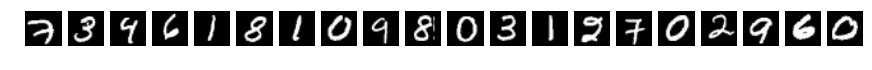

In [134]:
num_samples = 20
samples = range(num_samples)
fig, subplots = plt.subplots(1, num_samples)
fig.set_size_inches(15, 15)

for i, s in enumerate(subplots.flatten()):
    s.imshow(np.reshape(train[0][i, :], [28, 28]), cmap='gray')
    s.axis('off')

Next, we prepare $X$ and $y$ variables

In [135]:
X = train[0]
y = train[1]

X_test = test[0]
y_test = test[1]

To train the model we will (obviously) use gradient descent. Inside the loop we need a method to compute the gradients. Let's start with implementing it, together with some helper functions.

In [136]:
# We will store the weights in a D x c matrix, where D is the number of features, and c is the number of classes
#weights = (...) # TODO: Fill in, be sure to have the right shape!
weights = np.zeros([X.shape[1], 10])


def softmax(z):
    ########################################
    # TODO: implement the softmax function #
    ########################################
    return 0.

def predict(weights, X):
    ###################################
    # TODO: compute the probabilities #
    ###################################
    return 0.

def compute_loss_and_gradients(weights, X, y, l2_reg):
    #############################################################################
    # TODO: compute loss and gradients, don't forget to include regularization! #
    #############################################################################
    return loss, grad

We are now in position to complete the training pipeline.

If you have problems with convergence, be sure to check the gradients numerically.

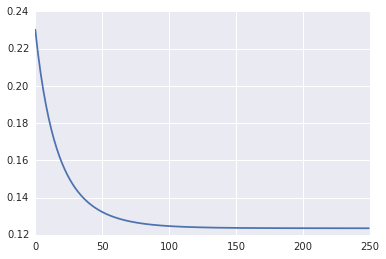

In [137]:
l2_reg = 0.5
n_epochs = 250
lr = 0.05

losses = []
for i in range(n_epochs):
    loss, grad = compute_loss_and_gradients(weights, X, y, l2_reg)
    losses.append(loss)
    
    weights -= lr * grad

plt.plot(losses)

Now compute your accuracy on the training and test sets.

In [138]:
##############################
# TODO: compute the accuracy #
##############################

Training Accuracy:  0.834
Test Accuracy:  0.812


We can also visualize the weights learned by our algorithm. Try to anticipate the result before executing the cell below.

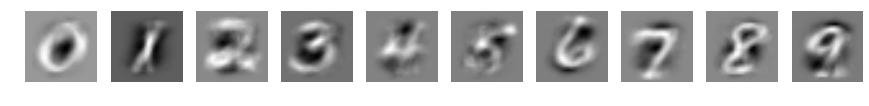

In [140]:
fig, subplots = plt.subplots(1, 10)
fig.set_size_inches(15, 15)

for i, s in enumerate(subplots.flatten()):
    s.imshow(np.reshape(np.array(weights[:, i]), [28, 28]), cmap='gray')
    s.axis('off')

Note that we only used a small portion of the data to develop the model. Now, implement the training on full data. 
Make sure to leverage the `mnist.train.next_batch(...)` method. Also, validate your model properly and find a good value for `l2_reg` hyperparameter. Try to experiment with `batch_size`.

In [ ]:
################################################
# TODO: implement the proper training pipeline #
################################################